## Introduction

> **Dataset**: 
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

> **The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).**

## Table of Contents
<ul>
<li><a href="#intro">Introduction of data and data type</a></li>
<li><a href="#processing">Data pre-processing</a></li>
<li><a href="#DT">Decision Tree</a></li>
</ul>

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import  MinMaxScaler
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score




## Load data

In [2]:
#load data and seperate it with ; to make each object to its entity
df = pd.read_csv('bank-additional-full.csv',sep=';')
pd.set_option('max_columns', None)
#print first 5 rows in data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# get all the info for data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Now we can notice that the data contain 11 features of type object and 5 features of type integer and 5 features of type float

In [4]:
# Return unique categories in each coloum
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [5]:
#Return statistics information of numeric features 
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


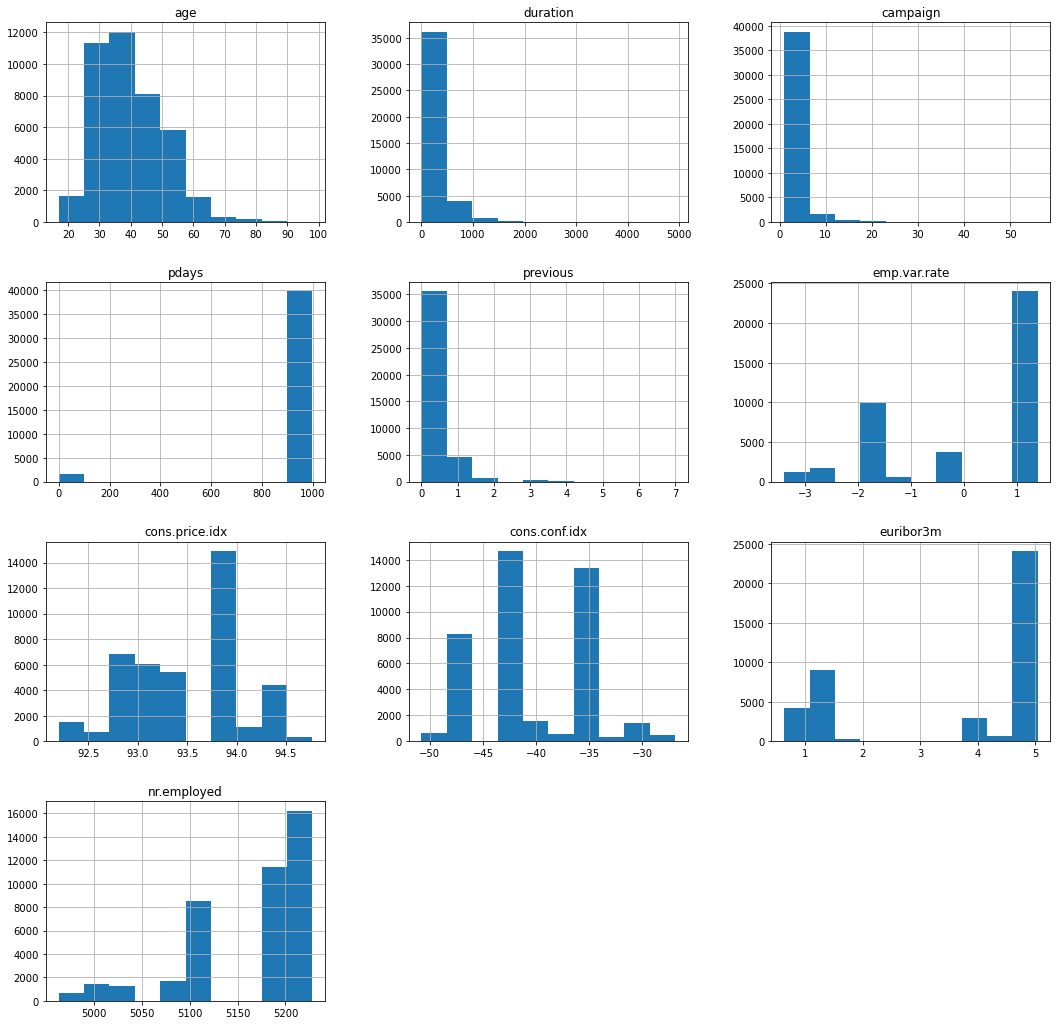

In [6]:
# Visualize each feature by histogram 
df.hist(figsize=(18,18));

In [7]:
#retuen the count of yes , no values
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

# Cleaning data

>**Dealing with duplication data**

In [8]:
# return the number of duplicated row 
df.duplicated().sum()

12

In [9]:
# removing duplicates 
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

#### Now there is no duplicated 

## Methods to deal with our data

>**A Function that gives a list containing the names of the categorical columns**


In [11]:
#This function take the data and return a list containing categorical columns
def get_cat (dataf):
    #empty list to store in it the features
    l_cat_attr=[]
    #for loop to check each type of data
    for i,j in zip(dataf.dtypes,df.columns):
        if i =='object':
            #append the categorical feature into the list
            l_cat_attr.append(j)
    #finall return the categorical features
    return l_cat_attr

l_cat_attr=get_cat(df)

### Transformation 

> **We need to convert categorica to numerical**
>
> **to convert each column one by one to avoid errors coming from fit_tarnsform method so we need this function** 


In [12]:
#we assign variable by OrdinalEncoder object
ordinal_enco=OrdinalEncoder()
#we need empty list to store in it the coloumns after converting them
np_l=[]
np_indicator=[]
#for loop to transform each category type to numeric type
for i in l_cat_attr:
    jj_dataframe=df[['{}'.format(i)]]
    np_cat=ordinal_enco.fit_transform(jj_dataframe)
    np_l.append(np_cat)
    np_indicator.append(ordinal_enco.categories_ )
#finally we have a list contating converted features
indicte=[x for x in zip(l_cat_attr,np_indicator)]    

>**A Function that get index of unknown value or nonexistent values  in indicte list**


In [13]:
def indexOfUnknown(col):
    w1 = 'unknown'
    w2 = 'nonexistent'
    ind = indicte
    for i in ind:
        if i[0]==col:
            c= 0
            for x in i[1][0]:
                if x==w1 or x==w2:
                    return c
                else:
                    c+=1

In [14]:
#Return the index number of unknown values in each feature
for i in l_cat_attr:
    print(i,': ',indexOfUnknown(i))

job :  11
marital :  3
education :  7
default :  1
housing :  1
loan :  1
contact :  None
month :  None
day_of_week :  None
poutcome :  1
y :  None


### Transforming categorical attributes to numerical ones.

In [15]:
cat_pipeline = ColumnTransformer([("cat",OrdinalEncoder(),l_cat_attr),])
np_prepared_cat = cat_pipeline.fit_transform(df)
np_prepared_cat.shape

(41176, 11)

<li> df_catt: is a dataframe that has the transformed categorical attributes.</li>
<li>df_num: is a dataframe that has the original numerical attributes.</li>

In [16]:
df_catt=pd.DataFrame(np_prepared_cat,columns=l_cat_attr)
df_num=df.drop(columns=l_cat_attr)
np_all=np.c_[df_num,df_catt]
df_all=pd.DataFrame(np_all,columns=list(df_num.columns)+l_cat_attr)
df_all.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,0.0
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0,0.0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0,0.0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,0.0
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,1.0,0.0


#### We can notice that all the data have become numerical 

### Correlation between attributes

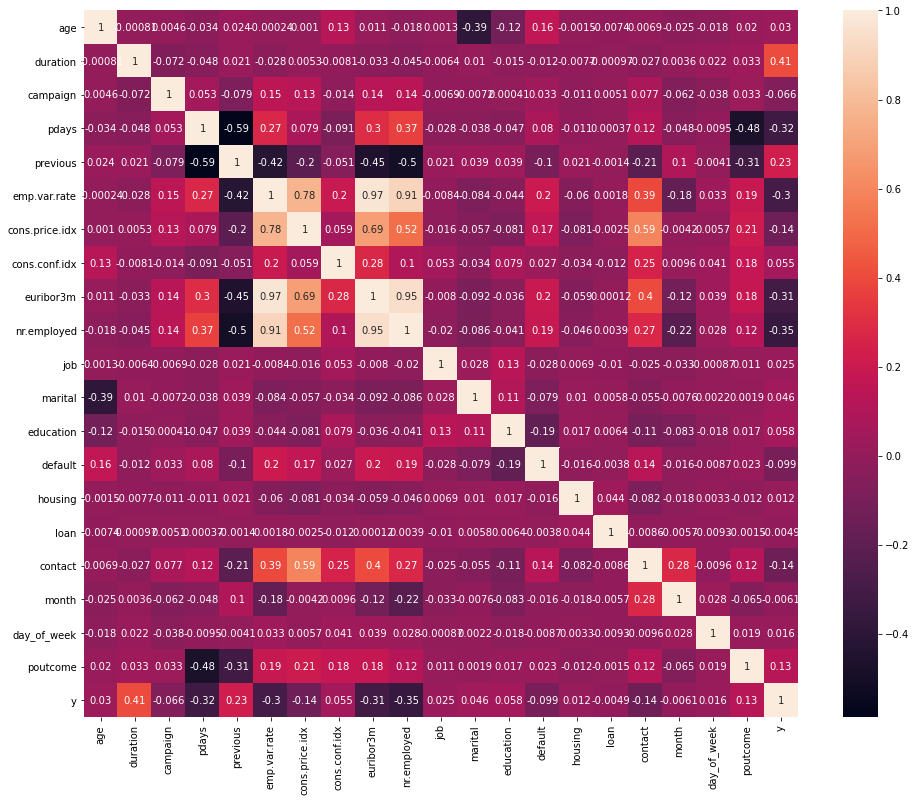

In [17]:
#Visualize the correlation matrix of the all attributes
plt.figure(figsize=(16, 13))
sns.heatmap(df_all.corr(), annot=True)
plt.show()



###  We notice that the three attributes **["emp.var.rate", "nr.employed", "euribor3m"]** are highly correlated so we plot them to determine which two of the three will be removed according to the highest correlation value

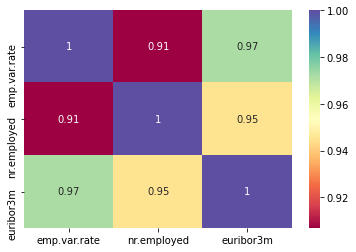

In [18]:
sns.heatmap(df_all[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True, cmap='Spectral')
plt.show()

### so we will drop ['euribor3m','emp.var.rate']

In [19]:
df_all.drop(columns = ['euribor3m','emp.var.rate'],inplace = True)

In [20]:
all_data_df=df_all.copy()

## Dealing with unknown values 

>**Replacing the unknown values with a random value from the same attribute in the columns ['job', 'marital'] since their count was too low to cause any significant change**

>**The reason for not doing the same with ['education'] as we did with the previous two columns is that the number of records is relatively large compared to the other two. If they were to be randomized they would cause a noticable change in the ratio between the other records' counts.**

In [21]:
# return the count of repeated values
# remember 11 refear to unknown values
all_data_df['job'].value_counts()

0.0     10419
1.0      9253
9.0      6739
7.0      3967
4.0      2924
5.0      1718
2.0      1456
6.0      1421
3.0      1060
10.0     1014
8.0       875
11.0      330
Name: job, dtype: int64

In [22]:
all_data_df['job'].replace((indexOfUnknown('job')),np.random.randint(0,indexOfUnknown('job')),inplace=True)

In [23]:
# return the count of repeated values
# remember 3 refear to unknown values
all_data_df['marital'].value_counts()

1.0    24921
2.0    11564
0.0     4611
3.0       80
Name: marital, dtype: int64

In [24]:
all_data_df['marital'].replace((indexOfUnknown('marital')),np.random.randint(0,indexOfUnknown('marital')),inplace=True)

In [25]:
# return the count of repeated values
# remember 7 refear to unknown values
all_data_df['education'].value_counts()

6.0    12164
3.0     9512
2.0     6045
5.0     5240
0.0     4176
1.0     2291
7.0     1730
4.0       18
Name: education, dtype: int64

In [26]:
all_data_df.drop(all_data_df.loc[all_data_df['education']==indexOfUnknown('education')].index, axis = 0 ,inplace = True)

## Drop 'default' coloumn cause it has only 3 values 'yes', 'no' and 'unknown', so if we replace unknown all values will be no because their is only 3 yes.

In [27]:
all_data_df['default'].value_counts()

0.0    31395
1.0     8048
2.0        3
Name: default, dtype: int64

In [28]:
# removing this coloumn
all_data_df.drop(columns=['default'],inplace=True)

## Dealing with irrelevent attributes

In [29]:
## removing irrelevent attributes
all_data_df.drop(columns=['pdays','contact'],inplace=True)

>**Drop poutcome cause have more than 71% observation unknowns**

In [30]:
all_data_df['poutcome'].value_counts()

1.0    34091
0.0     4067
2.0     1288
Name: poutcome, dtype: int64

In [31]:
all_data_df.drop(columns=['poutcome'],inplace=True)

### Check ['housing'] , ['loan'] values

In [32]:
all_data_df['housing'].value_counts()

2.0    20696
0.0    17800
1.0      950
Name: housing, dtype: int64

In [33]:
all_data_df['loan'].value_counts()

0.0    32490
2.0     6006
1.0      950
Name: loan, dtype: int64

### Using crosstab to check if the unknown values in the columns **['loan', 'housing']** are in the same records.

In [34]:
pd.crosstab(all_data_df['housing'],all_data_df['loan'])

loan,0.0,1.0,2.0
housing,,,
0.0,15339,0,2461
1.0,0,950,0
2.0,17151,0,3545


### Drop housing and loan null values because:

> <li>1.both have same unknwons values</li>
> <li>2.it is boolean so it is sensitive for any error</li>

In [35]:
#When we drop them from 'housing' directly they will be dropped in 'loan' too
all_data_df.drop(all_data_df.loc[all_data_df['housing']==indexOfUnknown('housing')].index, axis = 0 ,inplace = True)

## Scale data

In [36]:
# divided the duration to be in  minutes instead of seconds
all_data_df['duration']=all_data_df['duration'].apply(lambda x:x/60 )

### let's see what happend after randmization


In [37]:
# check the attributes after removing the previous features
removed_attri=['pdays','contact','default','poutcome']
l_cat_attr

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [38]:
# what we have now in our data 
new_l_cat_attr=['job','marital','education','housing','loan','month','day_of_week','y']

## Check the unknown values after we dealt with them

In [39]:
for i in new_l_cat_attr :
    print(i,': ',all_data_df[all_data_df[i] == indexOfUnknown(i)].shape[0])

job :  0
marital :  0
education :  0
housing :  0
loan :  0
month :  0
day_of_week :  0
y :  0


### Finally there is no unknown values

## Checking the unique categories after cleaning data

In [40]:
all_data_df.nunique()

age                 77
duration          1518
campaign            41
previous             8
cons.price.idx      26
cons.conf.idx       26
nr.employed         11
job                 11
marital              3
education            7
housing              2
loan                 2
month               10
day_of_week          5
y                    2
dtype: int64

## Applying Discretization

>**AGE**

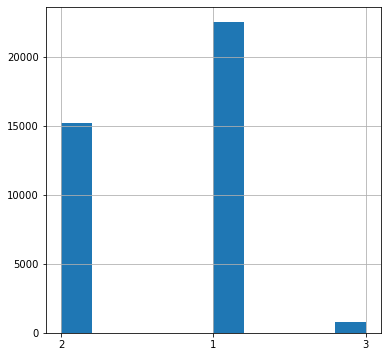

In [41]:
# Make it in 3 bins
all_data_df['age']=pd.cut(all_data_df['age'],bins=[18,40,60,np.inf],labels=['1','2','3'])
all_data_df['age'].hist(figsize=(6,6));

In [42]:
#train_all['age'].hist(figsize=(6,6));

In [43]:
#check null values
all_data_df.isnull().sum()

age               17
duration           0
campaign           0
previous           0
cons.price.idx     0
cons.conf.idx      0
nr.employed        0
job                0
marital            0
education          0
housing            0
loan               0
month              0
day_of_week        0
y                  0
dtype: int64

>**DURATION**

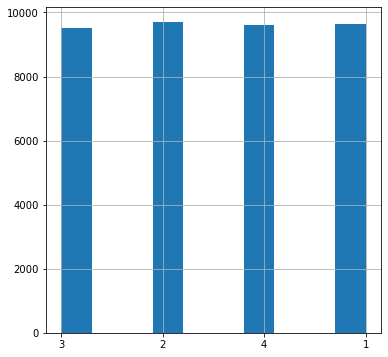

In [44]:
#Make them in 4 bins
all_data_df['duration']=pd.qcut(all_data_df['duration'],q=4,labels=list('1234'))
all_data_df['duration'].hist(figsize=(6,6));

In [45]:
all_data_df['duration'].value_counts()

2    9697
1    9653
4    9621
3    9525
Name: duration, dtype: int64

>**NR.EMPLOYED**

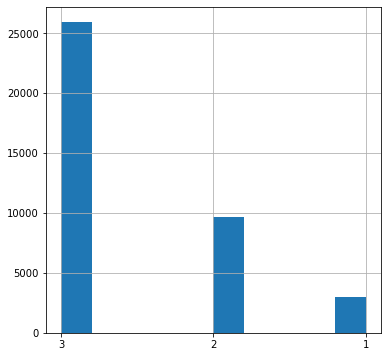

In [46]:
all_data_df['nr.employed']=pd.cut(all_data_df['nr.employed'],bins=3,labels=['1','2','3'])
all_data_df['nr.employed'].hist(figsize=(6,6));

>**CAMPAIGN**

In [47]:
all_data_df['campaign'].value_counts()

1.0     16493
2.0      9874
3.0      4987
4.0      2474
5.0      1511
6.0       919
7.0       588
8.0       375
9.0       261
10.0      209
11.0      166
12.0      116
13.0       77
14.0       64
17.0       55
15.0       48
16.0       45
18.0       32
20.0       30
19.0       23
21.0       20
22.0       17
23.0       16
24.0       15
27.0       11
29.0        9
28.0        8
25.0        7
26.0        7
31.0        7
30.0        7
35.0        5
33.0        4
32.0        4
34.0        3
40.0        2
43.0        2
42.0        2
41.0        1
39.0        1
37.0        1
Name: campaign, dtype: int64

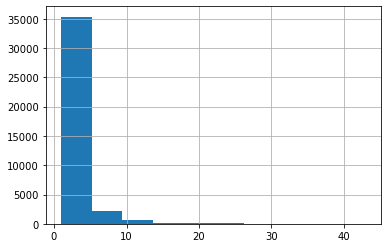

In [48]:
all_data_df['campaign'].hist();

In [49]:
#Make it in 8 bins
all_data_df['campaign']=pd.cut(all_data_df['campaign'],bins=8,labels=list('12345678') )


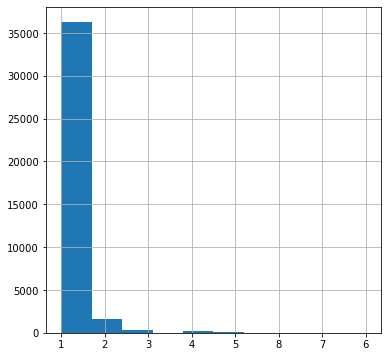

In [50]:
all_data_df['campaign'].hist(figsize=(6,6));

>**PREVIOUS**

In [51]:
all_data_df['previous'].value_counts()

0.0    33276
1.0     4263
2.0      684
3.0      195
4.0       57
5.0       16
6.0        4
7.0        1
Name: previous, dtype: int64

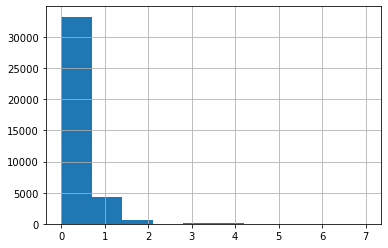

In [52]:
#Not making on it anything
all_data_df['previous'].hist();

>**Month**

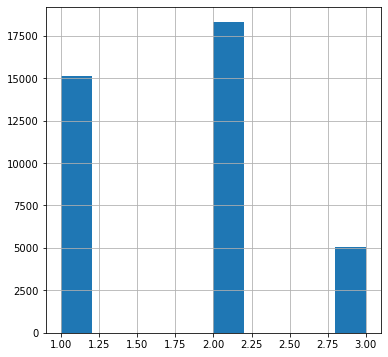

In [53]:
#Make it in 3 bins
all_data_df['month']=pd.cut(all_data_df['month'],bins=3,labels=[1,2,3]) 
all_data_df['month'].hist(figsize=(6,6));

>**CONS.PRICE.IDX**

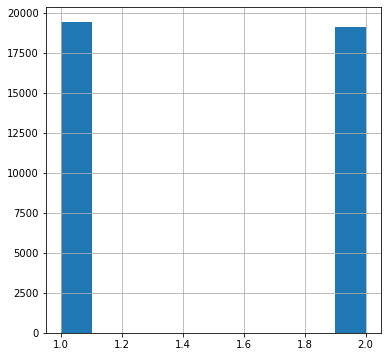

In [54]:
#Make it in 2 bins
all_data_df['cons.price.idx']=pd.cut(all_data_df['cons.price.idx'],bins=2,labels=[1,2]) 
all_data_df['cons.price.idx'].hist(figsize=(6,6));

>**CONS.CONF.IDX**

In [55]:
all_data_df['cons.conf.idx'].value_counts().sort_index()

-50.8     116
-50.0     271
-49.5     189
-47.1    2295
-46.2    5535
-45.9      10
-42.7    6215
-42.0    3462
-41.8    4019
-40.8     657
-40.4      63
-40.3     285
-40.0     186
-39.8     219
-38.3     203
-37.5     269
-36.4    7177
-36.1    4952
-34.8     231
-34.6     150
-33.6     159
-33.0     152
-31.4     701
-30.1     329
-29.8     236
-26.9     415
Name: cons.conf.idx, dtype: int64

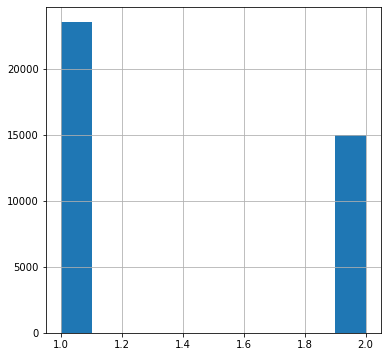

In [56]:
#Make it in 2 bins
all_data_df['cons.conf.idx']=pd.cut(all_data_df['cons.conf.idx'],bins=2,labels=[1,2]) 
all_data_df['cons.conf.idx'].hist(figsize=(6,6));

In [57]:
#train_all.nunique()

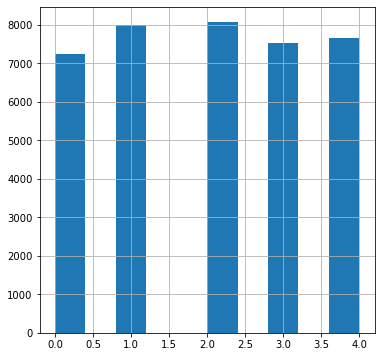

In [58]:
#Not making on it anything
all_data_df['day_of_week'].hist(figsize=(6,6));

## Check the number of categories after discretization

In [59]:
all_data_df.nunique()

age                3
duration           4
campaign           8
previous           8
cons.price.idx     2
cons.conf.idx      2
nr.employed        3
job               11
marital            3
education          7
housing            2
loan               2
month              3
day_of_week        5
y                  2
dtype: int64

In [60]:
all_data_df.dropna(inplace=True)

# Shape the spliting data

In [61]:
#drop all the features to have only labeled data 
all_data_df_y=all_data_df.drop(columns=list(all_data_df.columns)[:-1],axis=1)

In [62]:
all_data_df.drop('y',axis=1,inplace=True)

In [63]:
all_data_df.shape

(38479, 14)

In [64]:
#info about the data
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38479 entries, 0 to 41175
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             38479 non-null  category
 1   duration        38479 non-null  category
 2   campaign        38479 non-null  category
 3   previous        38479 non-null  float64 
 4   cons.price.idx  38479 non-null  category
 5   cons.conf.idx   38479 non-null  category
 6   nr.employed     38479 non-null  category
 7   job             38479 non-null  float64 
 8   marital         38479 non-null  float64 
 9   education       38479 non-null  float64 
 10  housing         38479 non-null  float64 
 11  loan            38479 non-null  float64 
 12  month           38479 non-null  category
 13  day_of_week     38479 non-null  float64 
dtypes: category(7), float64(7)
memory usage: 2.6 MB


In [65]:
#There is no null values
all_data_df.isnull().sum()

age               0
duration          0
campaign          0
previous          0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
job               0
marital           0
education         0
housing           0
loan              0
month             0
day_of_week       0
dtype: int64

## Visualizing data 

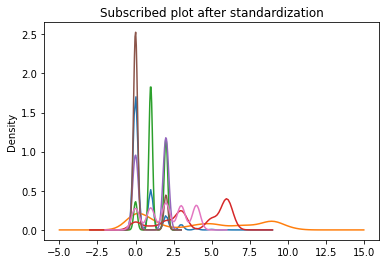

In [66]:
all_data_df[all_data_df_y.values == 1].plot(kind='density', ind=100, legend=False)
plt.title('Subscribed plot after standardization')
plt.show()

## Spliting data into train and test sets

In [67]:

X_train, X_test, y_train, y_test = train_test_split(all_data_df, all_data_df_y, test_size = 0.2, random_state=42)

# Building the Model

In [68]:
gb = CategoricalNB()
gb.fit(X_train, y_train.values.ravel())


CategoricalNB()

Accuracy :89.26715176715176 %


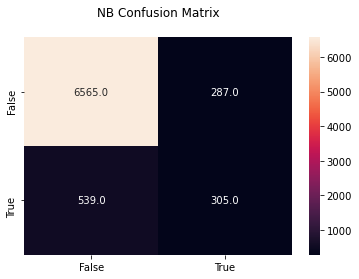

In [69]:
pred = gb.predict(X_test)
print('Accuracy :' + str(accuracy_score(y_test,pred)*100) + ' %')
cf_matrix = confusion_matrix(y_test, pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt = ".1f")

ax.set_title('NB Confusion Matrix\n');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()